In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

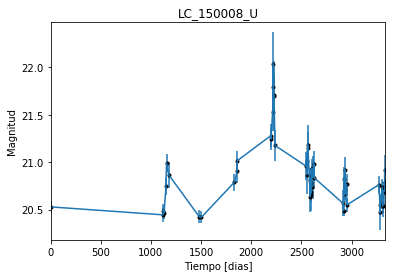

In [2]:
data = np.genfromtxt('LC_150008_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_150008_U')
plt.savefig("LC_150008_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

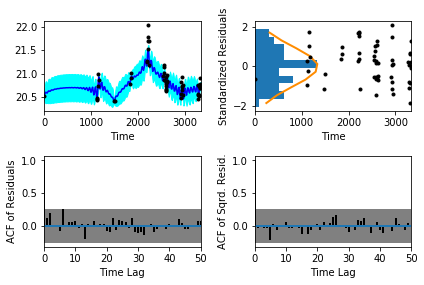

In [5]:
sample.assess_fit()

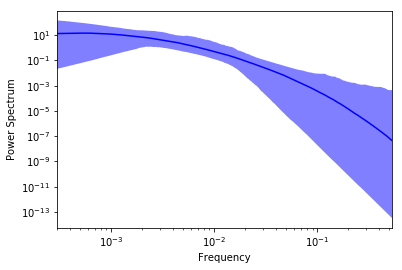

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

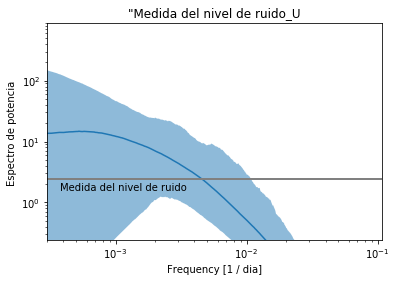

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_150008_U')
plt.title('"Medida del nivel de ruido_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_150008_U')

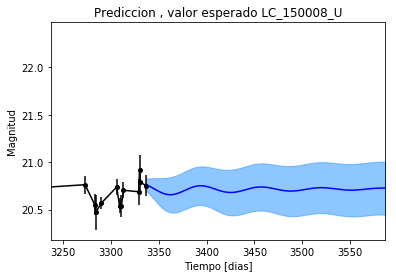

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_150008_U')

Text(0.5,1,'Prediccion, Caminos simulados  LC_150008_U')

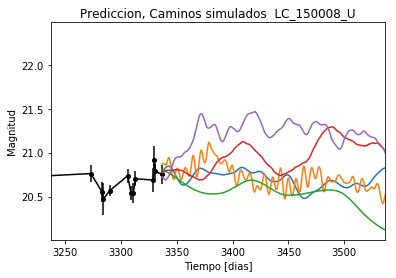

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_150008_U')

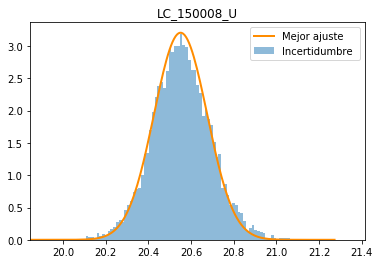

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_150008_U')
plt.savefig("Mejor_ajuste_LC_150008_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_150008_U')

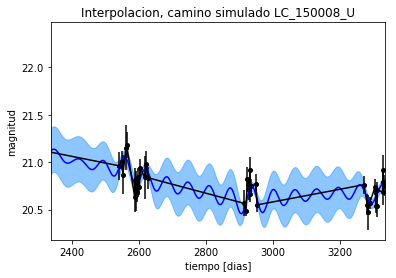

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_150008_U')

Text(0.5,1,'Interpolacion, camino simulado LC_150008_U')

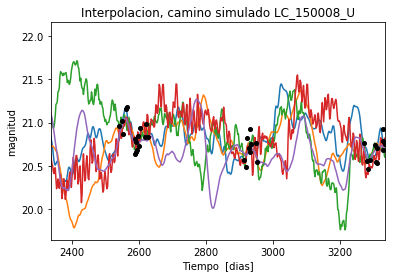

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_150008_U')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 2792.76877083
Median: 0.0188898702949
Standard deviation: 0.201340827864
68% credibility interval: [ 0.00137318  0.21598978]
95% credibility interval: [  4.14409057e-04   7.86464497e-01]
99% credibility interval: [  3.11108783e-04   9.80662164e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 278.820541229
Median: 0.00400361618168
Standard deviation: 0.0925164416776
68% credibility interval: [ 0.00070794  0.04676061]
95% credibility interval: [ 0.00033809  0.29370735]
99% credibility interval: [  3.04258497e-04   6.95853599e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 339.740432586
Median: 0.066768744922
Standard d

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1323.05880563
Median: 41.8833005655
Standard deviation: 1.71412839469
68% credibility interval: [ 39.95111731  43.12306273]
95% credibility interval: [ 37.40670732  43.95030307]
99% credibility interval: [ 35.32745001  44.67490139]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 416.924020707
Median: 1.19595800775
Standard deviation: 2.54557521556
68% credibility interval: [ 0.21133689  4.85073724]
95% credibility interval: [ 0.04494602  8.91979979]
99% credibility interval: [  0.01514064  12.64037241]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 715.068009222
Median: 1.02310405814
Standard deviation: 11.535520516
68% credibility interval: [  0.05645592  13.17809222]
95% credibility interval: [  9.29946258e-

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 754.094813974
Median: 9.67520369292e-28
Standard deviation: 4.90808708792e+78
68% credibility interval: [  8.57685850e-94   3.43305589e+43]
95% credibility interval: [  2.74205786e-126   2.73942059e+065]
99% credibility interval: [  9.91267744e-170   8.06631147e+076]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2335.90270632
Median: 20.7672055443
Standard deviation: 0.131218406426
68% credibility interval: [ 20.64843042  20.8685591 ]
95% credibility interval: [ 20.47485844  21.00684698]
99% credibility interval: [ 20.28253824  21.15868708]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 707.686871648
Median: 0.018026776243
Standard deviation: 0.27265682113
68% credibility interval: [ 0.          0.46206026]
95% credibility interval: [ 0.          0.93886095]
99% credibility interval: [ 0.          1.03676367]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 707.686871648
Median: 0.018026776243
Standard deviation: 0.27265682113
68% credibility interval: [ 0.          0.46206026]
95% credibility interval: [ 0.          0.93886095]
99% credibility interval: [ 0.          1.03676367]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 376.188807568
Median: 0.0
Standard deviation: 0.00165475703743
68% credibi

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1323.05880563
Median: 41.8833005655
Standard deviation: 1.71412839469
68% credibility interval: [ 39.95111731  43.12306273]
95% credibility interval: [ 37.40670732  43.95030307]
99% credibility interval: [ 35.32745001  44.67490139]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1382.2755099
Median: 0.106573803141
Standard deviation: 0.0807051090732
68% credibility interval: [ 0.06856386  0.18112567]
95% credibility interval: [ 0.04754171  0.33306637]
99% credibility interval: [ 0.03744188  0.51525917]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2286.5122221
Median: 0.958356262121
Standard deviation: 0.17008738134
68% credibility interval: [ 0.80988312  1.14538465]
95% credibility interval: [ 0.70335425  1.36047628]
99% credibility interval: [ 0.64540975  1.53365156]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 309.9169718
Median: 0.000837548999166
Standard deviation: 0.799201193072
68% credibility interval: [  2.57503300e-46   1.19969390e-01]
95% credibility interval: [  4.67024471e-68   2.39523549e+00]
99% credibility interval: [  2.41945883e-79   5.36344348e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 2792.76877083
Median: (-0.118688555492-1.11076456657j)
Standard deviation: 2.1296186336
68% credibility interval: [-1.35710378+0.j         -0.00862796-0.00690638j]
95% credibility interval: [ -4.94150218e+00-0.07302949j  -2.60380890e-03-0.0927368j ]
99% credibility interval: [ -6.16168210e+00+0.j          -1.95475413e-03-6.16182008j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 278.820541229
Median: (-0.0251554623683+0.0379777912798j)
Standard deviation: 1.80908862238
68% credibility interval: [-0.29380558+6.16957564j -0.00444813+1.50507066j]
95% credibility interval: [-1.84541771 +3.85775390e+00j -0.00212427 +2.04672959e-03j]
99% credibility interval: [ -4.37217711e+00+1.09155948j  -1.91171252e-03+0.j        ]
Post